# LOAN STATUS PREDICTION

DATA INFO...
Problem Statement
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. 
Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit 
History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible
for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Impoet data file

In [2]:
loan=pd.read_csv("C:/Users/sohel/Downloads/loan data.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.shape # Dimention of the data set

(614, 13)

In [4]:
loan.size # Total number of observations of the data set

7982

In [5]:
loan.head() # First five rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan.tail() # Last five rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
loan.describe() # it gives discriptive ststistics of all columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# checking missing value in dataset
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data cleaning

In [9]:

loan["Gender"]=loan["Gender"].fillna(loan["Gender"].mode().iloc[0])


In [10]:
loan["Married"]=loan["Married"].fillna(loan["Married"].mode().iloc[0])


In [11]:
loan["Dependents"]=loan["Dependents"].fillna(loan["Dependents"].mode().iloc[0])


In [12]:
loan["Self_Employed"]=loan["Self_Employed"].fillna(loan["Self_Employed"].mode().iloc[0])


In [13]:
loan["LoanAmount"]=loan["LoanAmount"].fillna(loan["LoanAmount"].mean())

In [14]:
loan["Loan_Amount_Term"]=loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mean())

In [15]:
loan["Credit_History"]=loan["Credit_History"].fillna(loan["Credit_History"].mean())

In [16]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [17]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# Now there is no missing observation in our dataset

<AxesSubplot:>

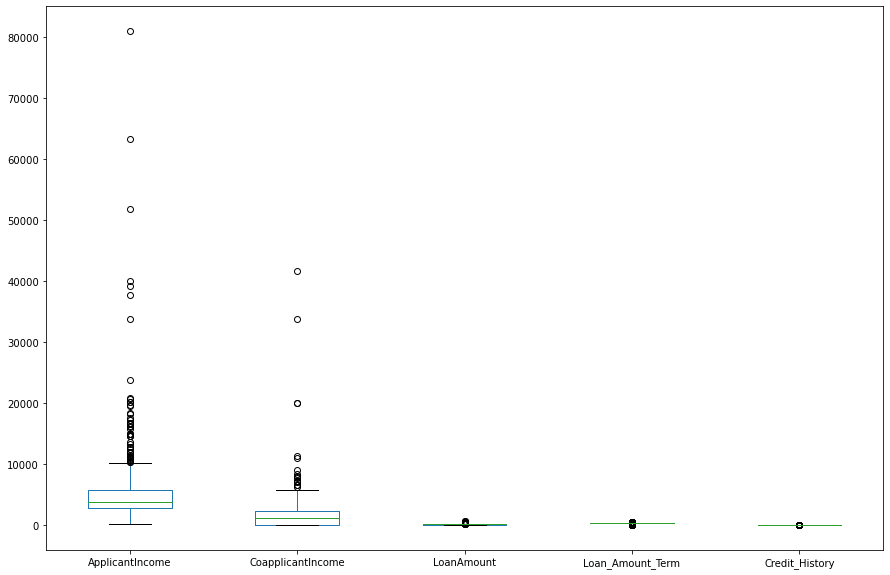

In [19]:
#Drowing Box plot
loan.plot(kind="box",figsize=(15,10))

In [20]:
loan=loan[loan.ApplicantIncome<7500]

In [21]:
loan.shape

(521, 13)

<AxesSubplot:>

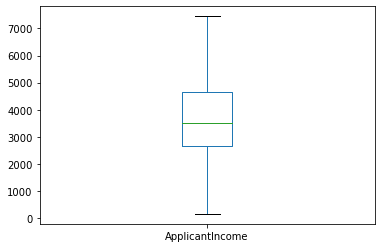

In [22]:
loan.ApplicantIncome.plot(kind="box")

<AxesSubplot:>

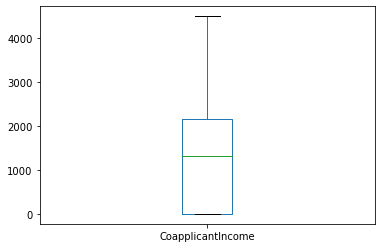

In [114]:
loan=loan[loan.CoapplicantIncome<4500]
loan.CoapplicantIncome.plot(kind="box")

<AxesSubplot:>

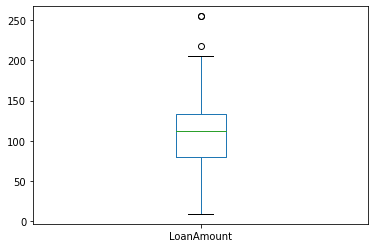

In [116]:
loan=loan[loan.CoapplicantIncome<200]
loan.LoanAmount.plot(kind="box")

In [23]:
loan["Gender"].value_counts()

Male      423
Female     98
Name: Gender, dtype: int64

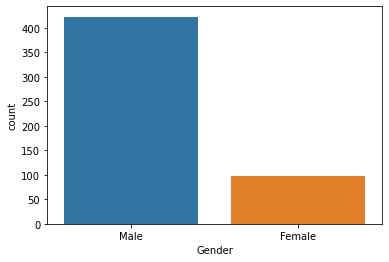

In [24]:
sb.countplot(loan["Gender"])
plt.show()

In [25]:
loan["Married"].value_counts()


Yes    335
No     186
Name: Married, dtype: int64

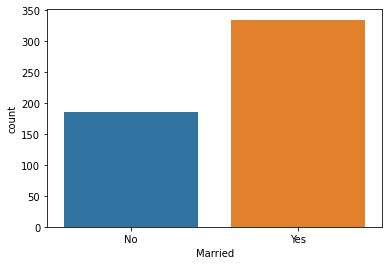

In [26]:
sb.countplot(loan["Married"])
plt.show()

In [27]:
loan["Dependents"].value_counts()


0     316
2      86
1      80
3+     39
Name: Dependents, dtype: int64

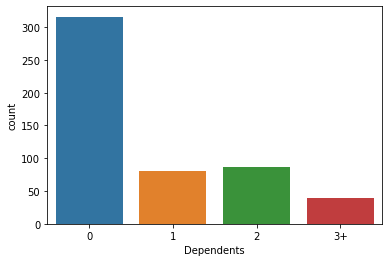

In [28]:
sb.countplot(loan["Dependents"])
plt.show()

In [29]:
loan["Education"].value_counts()


Graduate        391
Not Graduate    130
Name: Education, dtype: int64

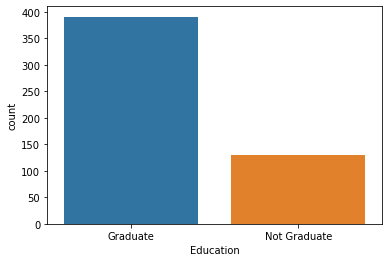

In [30]:
sb.countplot(loan["Education"])
plt.show()

In [31]:
loan["Self_Employed"].value_counts()


No     465
Yes     56
Name: Self_Employed, dtype: int64

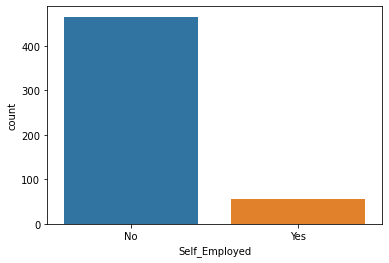

In [32]:
sb.countplot(loan["Self_Employed"])
plt.show()

In [33]:
loan["Property_Area"].value_counts()


Semiurban    202
Urban        167
Rural        152
Name: Property_Area, dtype: int64

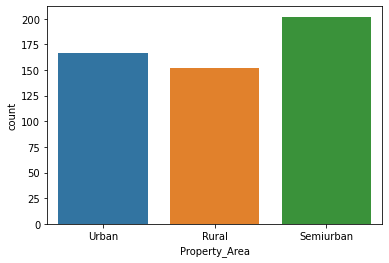

In [34]:
sb.countplot(loan["Property_Area"])
plt.show()

In [35]:
loan["Loan_Status"].value_counts()


Y    357
N    164
Name: Loan_Status, dtype: int64

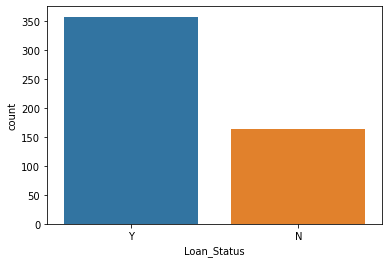

In [36]:
sb.countplot(loan["Loan_Status"])
plt.show()

<AxesSubplot:>

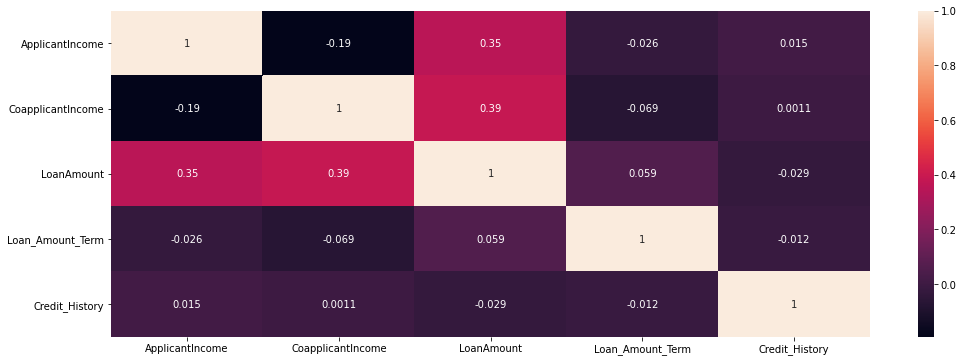

In [37]:
plt.figure(figsize=(17,6))
sb.heatmap(loan.corr(),annot=True)

In [38]:
loan.shape

(521, 13)

In [39]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder


In [41]:
loan["Gender"].replace(["Male","Female"],[1,0], inplace=True)    

In [42]:
loan["Married"].replace(["Yes","No"],[1,0],inplace=True)

In [43]:
loan["Dependents"].replace(["0","1","2","3+"],[0,1,2,3], inplace=True)

In [44]:
loan["Education"].replace(["Not Graduate","Graduate"],[0,1], inplace=True)


In [45]:
loan["Self_Employed"].replace(["No","Yes"],[0,1], inplace=True)


In [46]:
loan["Property_Area"].replace(["Semiurban","Urban","Rural"],[0,1,2], inplace=True)


In [47]:
loan["Loan_Status"].replace(["Y","N"],[1,0], inplace=True)

In [48]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


# spliting the data for train and test   

In [50]:
x=loan.drop(["Loan_ID","Loan_Status"],axis=True)

In [51]:
y=loan["Loan_Status"]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [54]:
x_train.shape,x_test.shape

((416, 11), (105, 11))

In [55]:
y_train.shape,y_test.shape

((416,), (105,))

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [57]:
model=LogisticRegression()

In [58]:
model.fit(x_train,y_train)

LogisticRegression()

In [59]:
pred=model.predict(x_test)

In [60]:
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [61]:
len(pred)

105

In [62]:
accuracy_score(y_test,pred)

0.8

In [63]:
confusion_matrix(y_test,pred)

array([[15, 19],
       [ 2, 69]], dtype=int64)

In [64]:
(15+69)/(15+19+2+69)

0.8

# Decision Tree classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model=DecisionTreeClassifier()

In [67]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
pred=model.predict(x_test)

In [69]:
pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [70]:
accuracy_score(y_test,pred)

0.7333333333333333

In [87]:
confusion_matrix(y_test,pred)

array([[19, 15],
       [13, 58]], dtype=int64)

In [88]:
(19+58)/(19+15+13+58)

0.7333333333333333

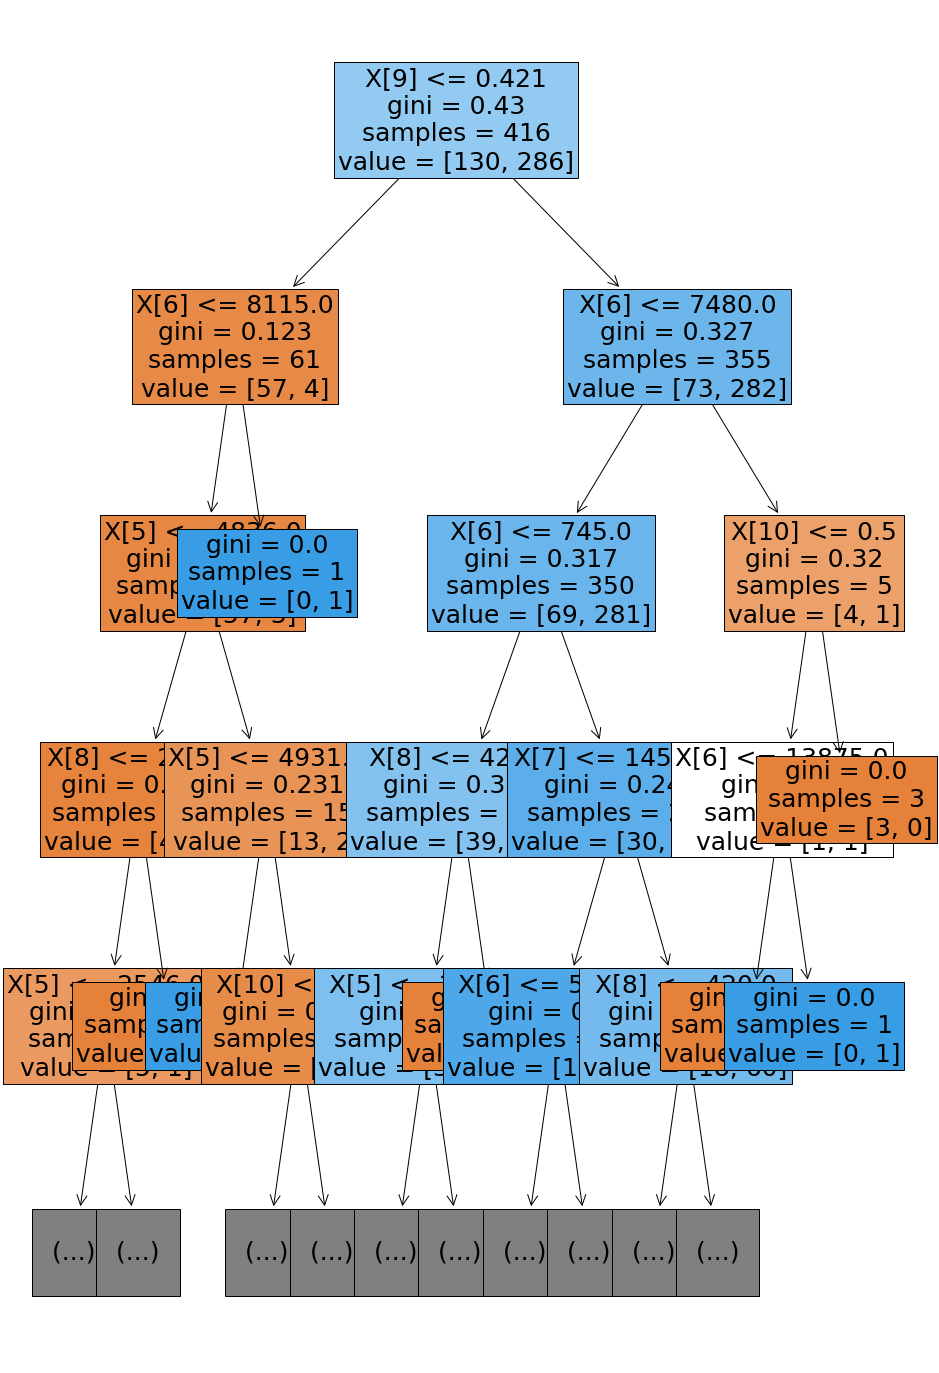

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,25))
from sklearn import tree
tr=tree.plot_tree(model,filled=True,fontsize=25,max_depth=4)

# KNN Classifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [93]:
model=KNeighborsClassifier(n_neighbors=5)

In [95]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [96]:
pred=model.predict(x_test)

In [97]:
pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [98]:
accuracy_score(y_test,pred)

0.6285714285714286

In [99]:
confusion_matrix(y_test,pred)

array([[ 6, 28],
       [11, 60]], dtype=int64)

In [100]:
(6+60)/(6+28+11+60)

0.6285714285714286

# Naive Bayes Algorithm

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
nb=GaussianNB()

In [105]:
nb.fit(x_train,y_train)

GaussianNB()

In [108]:
pred=nb.predict(x_test)

In [109]:
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [110]:
accuracy_score(y_test,pred)

0.780952380952381

In [111]:
confusion_matrix(y_test,pred)

array([[15, 19],
       [ 4, 67]], dtype=int64)

In [112]:
(15+67)/(15+19+4+67)

0.780952380952381